In [66]:
import numpy as np

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [70]:
from sklearn.linear_model import LinearRegression


In [72]:
from sklearn.metrics import mean_squared_error, r2_score #we will evaluate the model performance by mean square error and R2 square

In [74]:
import joblib #it will allow us to save the trained model 

In [76]:
np.random.seed(42)

In [78]:
#generate random data for hours studied (Feature1) and test scores (target)
n_samples =500
X1= np.random.uniform(1,10, n_samples)
noise = np.random.normal(0,5, n_samples)
y = 10*X1 +noise

In [80]:
#create a dataframe for easy manipulation
data = pd.DataFrame({"Hours_Studied":X1, "Test_Score":y})

In [82]:
data.head()

,Hours_Studied,Test_Score
0,4.370861,45.417391
1,9.556429,104.945142
2,7.587945,80.631574
3,6.387926,60.994745
4,2.404168,19.549604


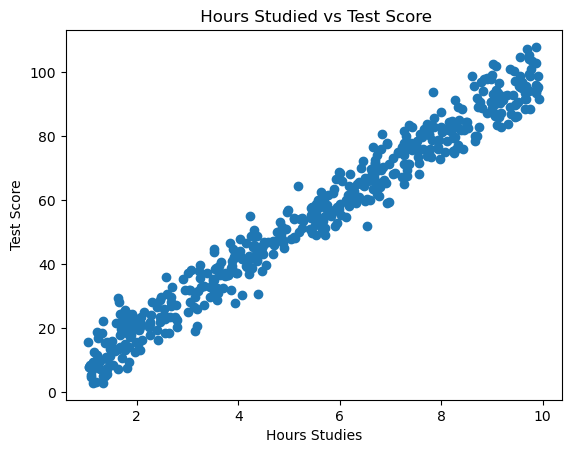

               Hours_Studied  Test_Score
Hours_Studied       1.000000    0.983399
Test_Score          0.983399    1.000000


In [84]:
#Scatter plot to visualize the relationship
plt.scatter(data["Hours_Studied"],data["Test_Score"])
plt.title(" Hours Studied vs Test Score")
plt.xlabel("Hours Studies")
plt.ylabel("Test Score")
plt.show()

# check the correlation between features and target
corr_matrix = data.corr()
print(corr_matrix)

In [96]:
#split the dataset into independent variables (x) and dependent variable (y)
X = data[["Hours_Studied"]]
y = data[["Test_Score"]]

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size =0.2, random_state = 42)


#scale the features using StandardScaler (it ensures that all the features have a similar range and it has a mean of 0 and standard deviation of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [98]:
#instantiate the linear regression model
model = LinearRegression()
#train the model on the training data
model.fit(X_train_scaled,y_train)


#check the model's coefficients and intercept
# coefficient indicates how much the target variable Y changes for every unit change in the independent variable X. میزان تأثیر هر ویژگی روی خروجی
# model.intercept represents the y-intercept of the regression line. It is the predicted value of the target variable when all the features in x are zero. عدد ثابت (عرض از مبدأ): مقدار پیش‌بینی وقتی تمام ویژگی‌ها صفر باشند
print ("coefficent:", model.coef_)
print ("Intercept:", model.intercept_)

coefficent: [[27.31629308]]
Intercept: [55.31588684]


In [108]:
#example of predicting a single value using a new data point
new_data = np.array([[6]]) #exmpla value for hours studied
new_data_df = pd.DataFrame(new_data, columns = ["Hours_Studied"])

#scale the new data
new_data_scaled = scaler.transform(new_data_df)


#predict the test score
single_prediction = model.predict(new_data_scaled)

print(f"Predicted Test Score for 6 hours of study: {single_prediction[0]}")

Predicted Test Score for 6 hours of study: [62.60323521]


In [112]:
#predict on the test set
y_pred = model.predict(X_test_scaled)

#calculate Mean and Squared Error (MSE) and R-Squared (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 30.553279662942824
R-Squared: 0.958530117302458


In [114]:
#save the trained model to a file
joblib.dump(model, "linear_regression_model.pk1")
joblib.dump(scaler, "scaler.pk1")

['scaler.pk1']

In [116]:
#load the saved model and scaler
loaded_model = joblib.load("linear_regression_model.pk1")
loaded_scaler = joblib.load("scaler.pk1")

In [118]:
#load the saved model and scaler
loaded_model = joblib.load("linear_regression_model.pk1")
loaded_scaler = joblib.load("scaler.pk1")

#example of predicting a single value using a new data point
new_data = np.array([[6]]) #exmpla value for hours studied
new_data_df = pd.DataFrame(new_data, columns = ["Hours_Studied"])

#scale the new data
new_data_scaled = scaler.transform(new_data_df)


#predict the test score
single_prediction = model.predict(new_data_scaled)

print(f"Predicted Test Score for 6 hours of study: {single_prediction[0]}")

Predicted Test Score for 6 hours of study: [62.60323521]
